<a href="https://colab.research.google.com/github/shivendrra/SmallLanguageModel-project/blob/main/Demo%20Models/Colab%20Notebooks/GPTfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run this first always!
!pip install python-dotenv
!pip install youtube-transcript-api

In [ ]:
import timeit
start_time = timeit.default_timer()

In [ ]:
channel_Id_Json  = [
  "UCb_MAhL8Thb3HJ_wPkH3gcw", #phil edwards
  "UCA295QVkf9O1RQ8_-s3FVXg", #aevy tv
  "UCpFFItkfZz1qz5PpHpqzYBw", #nexpo
  "UCY1kMZp36IQSyNx_9h4mpCg", #mark robber
  "UCA19mAJURyYHbJzhfpqhpCA", #action lab shorts
  "UCqnbDFdCpuN8CMEg0VuEBqA", #new york times
  "UCddiUEpeqJcYeBxX1IVBKvQ", #the verge
  "UCcefcZRL2oaA_uBNeo5UOWg", #y-combinator
  "UCLXo7UDZvByw2ixzpQCufnA", #vox
  "UCsQoiOrh7jzKmE8NBofhTnQ", #varun mayya
  "UCUyvQV2JsICeLZP4c_h40kA", #thomas flight
  "UCvjgXvBlbQiydffZU7m1_aw", #the coding train
  "UCRI00CwLZdLRCWg5BdDOsNw", #canadian lad
  "UCEIwxahdLz7bap-VDs9h35A", #steve mould
  "UC4bq21IPPbpu0Qrsl7LW0sw", #slidebean
  "UCR1IuLEqb6UEA_zQ81kwXfg", #real engineering
  "UCIlU5KDHKFSaebYviKfOidw", #newsthink
  "UCtYKe7-XbaDjpUwcU5x0bLg", #neo
  "UCBJycsmduvYEL83R_U4JriQ", #mkbdh
  "UCRcgy6GzDeccI7dkbbBna3Q", #lemmino
  "UC3_BakzLfadvFrsnClMFWmQ", #john coogan
  "UCmGSJVG3mCRXVOP4yZrU1Dw", #johnny harris
  "UCFN6lQpfY8XIRdhv9G-f4bg", #henry belcaster
  "UConJDkGk921yT9hISzFqpzw", #freethink
  "UClWTCPVi-AU9TeCN6FkGARg", #EO
  "UCyHJ94JzwY92NsBVzJ2aE3Q", #econ
  "UCTqEu1wZDBju2tHkNP1dwzQ", #earthrise
  "UCcabW7890RKJzL968QWEykA", #CS 50
  "UCamLstJyCa-t5gfZegxsFMw", #colin and samir
  "UC415bOPUcGSamy543abLmRA", #cleo abraham
  "UCpMcsdZf2KkAnfmxiq2MfMQ", #arvin ash
  "UCqVEHtQoXHmUCfJ-9smpTSg", #answer in progress
  "UCYO_jab_esuFRV4b17AJtAw", #3blue1brown
  "UCHnyfMqiRRG1u-2MsSQLbXA", #veritasium
  "UCsXVk37bltHxD1rDPwtNM8Q", #kurzgesagt
  "UC9RM-iSvTu1uPJb8X5yp3EQ", #wendover
  "UCZaT_X_mc0BI-djXOlfhqWQ", #vice news
  "UCMiJRAwDNSNzuYeN2uWa0pA", #mrwhosetheboss
  "UCHpw8xwDNhU9gdohEcJu4aA", #theguardian
  "UCK7tptUDHh-RYDsdxO1-5QQ", #wallstreetjournal
  "UCsooa4yRKGN_zEE8iknghZA", #ted-ed
]

In [ ]:
import json
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv('yt_secret_key')

In [ ]:
from googleapiclient.discovery import build
from youtube_transcript_api import TranscriptsDisabled, YouTubeTranscriptApi
import logging

logging.basicConfig(filename='youtube_fetch.log', level=logging.ERROR)
youtube = build('youtube', 'v3', developerKey=api_key)

In [ ]:
import timeit

start_time = timeit.default_timer()

videoNo = 0
for links in channel_Id_Json:
  next_page_token = None
  videoIds = []

  while True:
    channelRes = youtube.channels().list(
      part='contentDetails', id=links
    ).execute()

    if 'items' in channelRes and channelRes['items']:
      playlistId = channelRes['items'][0]['contentDetails']['relatedPlaylists']['uploads']

      playlistResult = youtube.playlistItems().list(
        part='contentDetails', playlistId=playlistId,
        maxResults = 100, pageToken = next_page_token
      ).execute()

      videoIds.extend([item['contentDetails']['videoId'] for item in playlistResult.get('items', [])])

      next_page_token = playlistResult.get('nextPageToken')

      if not next_page_token:
        break

  for ids in videoIds:
    videoUrl = f"https://www.youtube.com/watch?v={ids}"
    try:
      raw_transcripts = []
      try:
        captions = YouTubeTranscriptApi.get_transcript(
          ids, languages=['en'], preserve_formatting=True
        )
        if captions:
          formatted_captions = [{'text': caption['text']} for caption in captions]
          raw_transcripts.append(formatted_captions)
          videoNo += 1
          print(f"Number of videos with valid captions are: {videoNo}")
        else:
          continue
      except TranscriptsDisabled as e:
        print(F"There was an error while getting the captions: {e}")
      except Exception as e:
        logging.error(f"There was some error while fetching the video: {str(e)}")
    except Exception as e:
      logging.error(f"There was some error while getting the captions: {str(e)}")

    with open('new_training_data.txt', 'a', encoding='utf-8') as file:
      for videoCaptions in raw_transcripts:
        for line in videoCaptions:
          file.write(line['text'] + ' ')

print(f"time taken to execute the code is {(timeit.default_timer() - start_time) / 60} mins")

In [ ]:
data_coll = timeit.default_timer()
print(f"time taken to fetch and write the data {(data_coll - start_time) / 3600} hrs")

**coding the tokenizer first**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import timeit

start_time_2 = timeit.default_timer()

In [3]:
# data for training the BPE
with open('/content/drive/MyDrive/training_data.txt', 'r', encoding='utf-8') as file:
  captions = file.read()

# tokenizing
import nltk
nltk.download('punkt')
token_caps = nltk.word_tokenize(captions)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# train test split
n = int(0.8*len(token_caps))
bpe_train_data = token_caps[:n]
bpe_val_data = token_caps[n:]

In [5]:
# importing the data
file_path = '/content/drive/MyDrive/new_training_data.txt'
with open(file_path, 'r', encoding='utf-8') as file:
  data = file.read()
total_no_of_words = len(data)
print(total_no_of_words)

219382798


In [6]:
# total no of chars and vocab size
chars = sorted(list(set(data)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡£­°²³´µ·¼½ÀÁÃÄÅÉÍÓÖ×ßàáâãäåæçèéêëìíîïñòóôõöøúüāăćČĐğīİŁłōśūŻʖʻʼ̴̵̶̷̸̡̢̧̨̛̖̗̘̙̜̝̞̟̠̣̤̥̦̩̪̫̬̭̮̯̰̱̲̳̹̺̻̼͇͈͉͍͎͓͔͕͖͙͚̀́̂̃̄̅̆̇̈̉̊̋̌̍̎̏̐̑̒̓̔̽̾̿̀́͂̓̈́͆͊͋͌͐͑͒͗͛̕̚͘͜͝͠͡ͅΧιρςστχόϑДಠ ​‍–—―‘’‚“”… ›‽⁠₂€₹™⅓⅔∆−≈⍵♩♪♫♬♭⚡✨。えァアウェオサシジスッデトナニビフブボメョリルロンー一万写動千夜如宇宏开忽春来树梨活真花萌风꞉️﻿，ａｄｅｇｈｉｍｎｒｔｕｖｙ�𝅘𝅥𝅮𝔻𝕄𝕌𝕐𝕒𝕓𝕔𝕕𝕖𝕗𝕘𝕙𝕚𝕛𝕜𝕝𝕞𝕟𝕠𝕡𝕢𝕣𝕤𝕥𝕦𝕧𝕨𝕪𝘐𝘢𝘣𝘤𝘥𝘦𝘧𝘩𝘪𝘭𝘮𝘯𝘰𝘱𝘳𝘴𝘵𝘶𝘸𝘺🔮🤔
416


In [7]:
# train-test split

n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [ ]:
# creating a sub-word level tokenizer
import re
from collections import defaultdict

class SubwordTokenizer:
    def __init__(self, num_merges):
        self.num_merges = num_merges
        self.vocab = None

    def get_stats(self, vocab):
        pairs = defaultdict(int)
        for word, freq in vocab.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i+1]] += freq
        return pairs

    def merge_vocab(self, pair, vocab):
        new_vocab = {}
        bigram = ' '.join(pair)
        replacement = ''.join(pair)
        for word in vocab:
            new_word = word.replace(bigram, replacement)
            new_vocab[new_word] = vocab[word]
        return new_vocab

    def learn_bpe(self, data):
        vocab = defaultdict(int)
        for word in data:
            vocab[''.join(list(word)) + '</w>'] += 1

        for i in range(self.num_merges):
            pairs = self.get_stats(vocab)
            if not pairs:
                break
            best_pair = max(pairs, key=pairs.get)
            vocab = self.merge_vocab(best_pair, vocab)

        self.vocab = vocab

    def tokenize_generator(self, text):
      if isinstance(text, list):
        for word in text:
            word = ' '.join(list(word))
            if word in self.vocab:
                yield word
            else:
                yield word[:2]  # yield the initial part of the word
                yield from (word[i:i+2] for i in range(2, len(word), 2) if word[i:i+2] in self.vocab)
      else:
        word = ' '.join(list(text))
        if word in self.vocab:
            yield word
        else:
            yield word[:2]  # yield the initial part of the word
            yield from (word[i:i+2] for i in range(2, len(word), 2) if word[i:i+2] in self.vocab)

    def tokenize(self, text):
      return list(self.tokenize_generator(text))

    def detokenize(self, tokens):
        detokenized_txt = ''.join(tokens)
        return detokenized_txt

# training the tokenizer on the training data
num_merges = 50
tokenizer = SubwordTokenizer(num_merges)
tokenizer.learn_bpe(bpe_train_data)

# tokenizing the data separately

# normal tokenization first
train_words = nltk.word_tokenize(train_data)
val_words = nltk.word_tokenize(val_data)

# sub-word tokenization in batches
batch_size = 100
trained_data = [tokenizer.tokenize(train_words[i:i+batch_size]) for i in range(0, len(train_words), batch_size)]
valed_data = [tokenizer.tokenize(val_words[i:i+batch_size]) for i in range(0, len(val_words), batch_size)]

In [ ]:
# flatten the batches
trained_data = [token for batch in trained_data for token in batch]
valed_data = [token for batch in valed_data for token in batch]

In [ ]:
print(train_data[:10])
print(tokenizer.detokenize(train_data[:10]))
print(val_data[:10])
print(tokenizer.detokenize(val_data[:10]))

In [ ]:
token_time = timeit.default_timer()
print(f"time taken to tokenize the data {(token_time - start_time_2) / 60} mins")

**gpt code from here**

In [8]:
# encoder and decoder of the text
string_to_index = { ch:i for i,ch in enumerate(chars) }
index_to_string = { i:ch for i,ch in enumerate(chars) }

encode = lambda s: [string_to_index[c] for c in s]
decode = lambda l: ''.join([index_to_string[i] for i in l])

print(encode('hello there'))
print(decode(encode('hello there')))

[73, 70, 77, 77, 80, 1, 85, 73, 70, 83, 70]
hello there


In [9]:
import torch

# Convert to tensors
train_data = torch.tensor(encode(train_data), dtype=torch.long)
val_data = torch.tensor(encode(val_data), dtype=torch.long)

In [10]:
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
block_size = 64 # what is the maximum context length for predictions?
max_iters = 3000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 128
n_head = 8
n_layer = 6
dropout = 0.0
# ------------

torch.manual_seed(1337)

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
steps = []
train_losses = []
val_losses = []

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        # Store step and loss values for visualization
        steps.append(iter)
        train_losses.append(losses['train'])
        val_losses.append(losses['val'])

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
torch.save(model.state_dict(), 'transformer_model.pth')
output_data = decode(m.generate(context, max_new_tokens=2000)[0].tolist())
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))

1.302688 M parameters
step 0: train loss 6.1863, val loss 6.1964
step 100: train loss 2.4948, val loss 2.6089
step 200: train loss 2.3751, val loss 2.4802
step 300: train loss 2.2446, val loss 2.3361
step 400: train loss 2.0902, val loss 2.1817
step 500: train loss 1.9708, val loss 2.0482
step 600: train loss 1.8690, val loss 1.9316
step 700: train loss 1.8134, val loss 1.8653
step 800: train loss 1.7624, val loss 1.8149
step 900: train loss 1.7183, val loss 1.7734
step 1000: train loss 1.6895, val loss 1.7365
step 1100: train loss 1.6592, val loss 1.6996
step 1200: train loss 1.6326, val loss 1.6644
step 1300: train loss 1.6094, val loss 1.6457
step 1400: train loss 1.5902, val loss 1.6242
step 1500: train loss 1.5778, val loss 1.6060
step 1600: train loss 1.5617, val loss 1.5909
step 1700: train loss 1.5465, val loss 1.5824
step 1800: train loss 1.5277, val loss 1.5618
step 1900: train loss 1.5175, val loss 1.5562
step 2000: train loss 1.5151, val loss 1.5513
step 2100: train loss 1.

In [11]:
model_train = timeit.default_timer()

print(f"time taken to train the model {(model_train - start_time_2) / 3600 } hrs")

time taken to train the model 2.1307289243749996 hrs


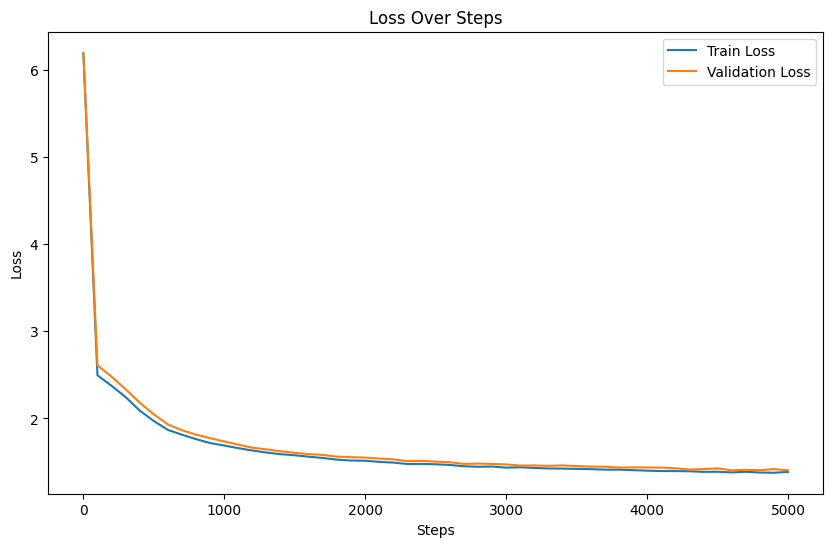

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Train Loss')
plt.plot(steps, val_losses, label='Validation Loss')
plt.title('Loss Over Steps')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# summary
end_time = timeit.default_timer()

total_time = (end_time - start_time_2) / 3600

ffn_factor = 4
embedding_params = n_embd * vocab_size
attention_params = n_head * (n_embd // n_head * 2 * n_embd) * n_layer

feedforward_params = n_embd * ffn_factor * n_layer * 2
total_param = sum(p.numel() for p in m.parameters()) / 1e6
total_params = embedding_params + attention_params + feedforward_params

print("///// summary /////")
print(f"total time taken was {total_time} hrs")
# print(f"time just to fetch the data was {(data_coll - start_time) / 3600} hrs and no of videos fetched were {videoNo}")
print(f"total no of words in the file were: {total_no_of_words/1e6} million")
print(f"total vocab size was {vocab_size}")
print("total no of calculated parameters:", total_params)
print("total no of actual parameters:", total_param)
print(f"time taken to train the model was {(model_train - start_time_2) / 3600}")
print(f"model ran for {max_iters} iterations and final val loss: {val_losses[-1]} and train loss: {train_losses[-1]}")
print('\n', '\n')
print("//// generated output ////")
print(output_data)

///// summary /////
total time taken was 2.130864538721111 hrs
total no of words in the file were: 219.382798 million
total vocab size was 416
total no of calculated parameters: 256000
total no of actual parameters: 1.302688
time taken to train the model was 2.1307289243749996
model ran for 5000 iterations and final val loss: 1.4056243896484375 and train loss: 1.3864963054656982

 

//// generated output ////

ties to good part the products. So so I was in MGM tends
the little stops
standards-limitation, right noteiz it only, $20° and only streamy,
we'll. We one if a percept to just to coming have kind of uh you know the told-one coolizes the 3 inspecificients in the startnagess you're techance it's a loot opions on them a specsion but cold was are and bailitacification presettly do you resouthcast him always sort of the activatity this is their opening a great considercus start large usually going through the end there are point of test reguting the discover of certain are businessand